# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



given your model score, why did you choose a specific model to present to us? is it cuz of the precision score? accuracy score? t score? to this score/f1 score? 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, r2_score, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import tree

from scipy.stats import zscore
from scipy import optimize

In [86]:
df = pd.read_csv ('data.csv')
df.shape

(6819, 96)

In [87]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [88]:
df.columns


Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

#### quick ratio = indicator of a company's short-term liquidity position, and measures a company's ability to meet its short-term obligations with its most liquid assets.
#### current ratio = a lquidity ratio that measures a company's ability to pay short-term obligations or those due within one year.
#### debt ratio = debt ratio determines the relative proportion of debt to total assets.  Debt Ratio = Total Debt/ Total Assets - The higher the number, the more the company has in liabilities than assets, which means it is relying on its debt over its equity, which is risky.
#### Another metric often used to predict potential bankruptcy is the Z-score, which is a combination of several financial ratios used to produce a single composite score.
#### The Altman Z-score is the output of a credit-strength test that gauges a publicly traded manufacturing company's likelihood of bankruptcy.

In [89]:
# Core ratios for Z-score calculation
df['Z_score'] = (
    1.2 * df[' Working Capital to Total Assets'] +
    1.4 * df[' Retained Earnings to Total Assets'] +
    3.3 * df[' Net Income to Total Assets'] +  # Approximation for EBIT/Total Assets
    0.6 * df[' Net worth/Assets'] +  # Substitute for Market Value of Equity/Book Liabilities
    1.0 * df[' Revenue Per Share (Yuan ¥)'] / df[' Total Asset Growth Rate']  # Scaled for Sales/Total Assets
)

# Target variable: Bankrupt? (1 = bankrupt, 0 = not bankrupt)
x = df[['Z_score', ' Debt ratio %', ' Cash Flow to Total Assets', " Net Income to Stockholder's Equity"]]
y = df['Bankrupt?']

from scipy.stats import zscore

# Calculate Z-scores for each feature
z_scores = np.abs(zscore(df[['Z_score', ' Debt ratio %', ' Cash Flow to Total Assets', " Net Income to Stockholder's Equity"]]))

# Set a threshold (e.g., 3 standard deviations)
outliers = (z_scores > 3)

# Print outliers indices
print(np.where(outliers))



(array([  56,   56,  427,  427,  610,  744, 1035, 1381, 1398, 1426, 1437,
       1440, 1507, 1520, 1528, 1560, 1565, 1577, 1624, 1630, 1682, 1684,
       1684, 1737, 1755, 1794, 1861, 1865, 1865, 1869, 1869, 1870, 1870,
       1876, 1899, 1949, 1951, 2001, 2001, 2001, 2004, 2004, 2005, 2005,
       2039, 2099, 2099, 2167, 2193, 2198, 2295, 2370, 2387, 2418, 2440,
       2440, 2470, 2470, 2496, 2586, 2605, 2640, 2640, 2735, 2735, 2784,
       2906, 2920, 2930, 2930, 3112, 3146, 3159, 3163, 3169, 3222, 3230,
       3245, 3350, 3365, 3372, 3373, 3374, 3392, 3395, 3493, 3510, 3518,
       3524, 3539, 3540, 3541, 3550, 3635, 3667, 3675, 3676, 3679, 3680,
       3682, 3687, 3691, 3695, 3695, 3695, 3706, 3799, 3826, 3827, 3830,
       3833, 3841, 3847, 3887, 3906, 3947, 3949, 3970, 3977, 3992, 3998,
       4028, 4115, 4116, 4227, 4227, 4232, 4238, 4338, 4338, 4344, 4431,
       4433, 4437, 4444, 4459, 4530, 4627, 4630, 4720, 4725, 4733, 4777,
       4817, 4827, 4849, 4863, 4877, 4918, 4948, 4

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [90]:
# Check for NaN or Inf values in your dataset
print(df.isna().sum())  # Check for NaN values
print(np.isinf(df).sum())  # Check for Inf values


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Z_score                                                     0
Length: 97, dtype: int64
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                      

In [91]:
# Replace NaN values with column mean
df.fillna(df.mean(), inplace=True)

# Replace zero values with a small non-zero value (e.g., a small epsilon)
df[[' Working Capital to Total Assets', ' Retained Earnings to Total Assets', ' Net Income to Total Assets',
    ' Net worth/Assets', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate']] = df[
    [' Working Capital to Total Assets', ' Retained Earnings to Total Assets', ' Net Income to Total Assets',
     ' Net worth/Assets', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate']].replace(0, 1e-10)


In [92]:
# Core ratios for Z-score calculation
df['Z_score'] = (
    1.2 * df[' Working Capital to Total Assets'] +
    1.4 * df[' Retained Earnings to Total Assets'] +
    3.3 * df[' Net Income to Total Assets'] +  # Approximation for EBIT/Total Assets
    0.6 * df[' Net worth/Assets'] +  # Substitute for Market Value of Equity/Book Liabilities
    1.0 * df[' Revenue Per Share (Yuan ¥)'] / df[' Total Asset Growth Rate']  # Scaled for Sales/Total Assets
)

# Target variable: Bankrupt? (1 = bankrupt, 0 = not bankrupt)
x = df[['Z_score', ' Debt ratio %', ' Cash Flow to Total Assets', " Net Income to Stockholder's Equity"]]
y = df['Bankrupt?']



In [93]:
# Check for Inf values in the Z-score column
print(np.isinf(df['Z_score']).sum())

# Optionally, clip values that are still too large (if desired)
df['Z_score'] = np.clip(df['Z_score'], -1e10, 1e10)


0


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_dep

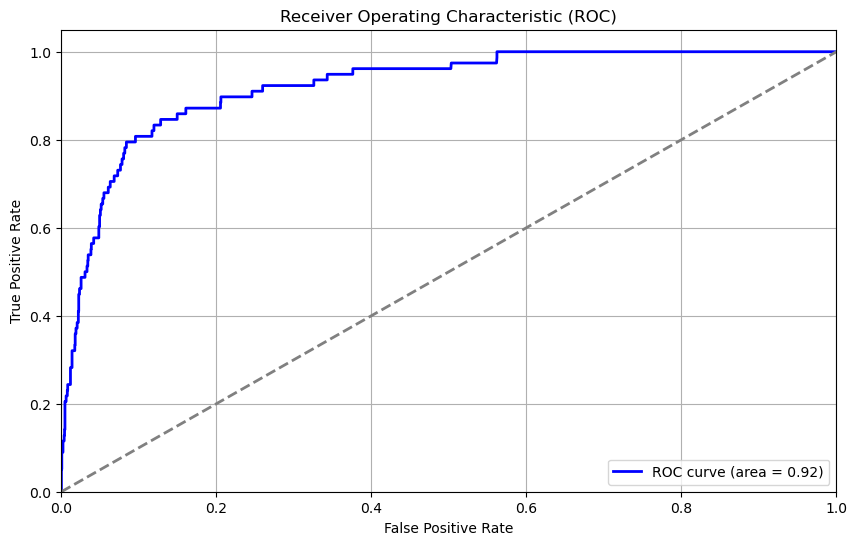

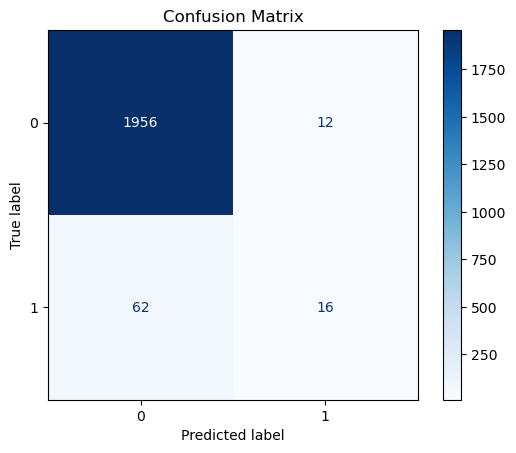

AUC Score: 0.922
F1 Score: 0.302

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.57      0.21      0.30        78

    accuracy                           0.96      2046
   macro avg       0.77      0.60      0.64      2046
weighted avg       0.95      0.96      0.96      2046



In [94]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
#(l2 -Ridge Regression here)
# C := inverse of regularization strength 
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_rf.predict(x_test)
y_prob = best_rf.predict_proba(x_test)[:, 1]  # Get probabilities for ROC

print("Best Hyperparameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))